# Introduction to Machine Learning and Toolkit Exercises 

Install Wrapper to use Google Drive Files

In [27]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Preparing to unpack .../04-gnupg_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg (2.1.15-1ubuntu8.1) over (2.1.15-1ubuntu8) ...
Preparing to unpack .../05-gnupg-agent_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking gnupg-agent (2.1.15-1ubuntu8

Setting up libkmod2:amd64 (24-1ubuntu2) ...
Setting up gir1.2-glib-2.0:amd64 (1.54.1-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up gnupg-agent (2.1.15-1ubuntu8.1) ...
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:a

In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [29]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p my_drive
!google-drive-ocamlfuse my_drive

In [36]:
!ls my_drive/Colab\ Notebooks/Intel_week1/data -la

total 70937
drwxr-xr-x 2 root root     4096 Jun 24 18:30 .
drwxr-xr-x 2 root root     4096 Jun 24 17:11 ..
-rw-r--r-- 1 root root   506428 Jun 24 18:30 Ames_Housing_Sales.csv
-rw-r--r-- 1 root root 70617257 Jun 24 18:30 Human_Activity_Recognition_Using_Smartphones_Data.csv
-rw-r--r-- 1 root root   566786 Jun 24 18:30 Human_Resources_Employee_Attrition.csv
-rw-r--r-- 1 root root     4609 Jun 25 04:00 Iris_Data.csv
-rw-r--r-- 1 root root   459910 Jun 24 18:30 Orange_Telecom_Churn_Data.csv
-rw-r--r-- 1 root root    15021 Jun 24 18:30 Wholesale_Customers_Data.csv
-rw-r--r-- 1 root root   457699 Jun 24 18:30 Wine_Quality_Data.csv
-rw-r--r-- 1 root root      776 Jun 24 18:30 X_Y_Sinusoid_Data.csv


## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the [data](../../data) directory.

In [40]:
from __future__ import print_function
import os
#data_path = ['data']

#After the drive setup we have mounted gdrive as my_drive in Colaboratory. So, now we can acess the files directly

#data_path = ['my_drive/Colab Notebooks/Intel_week1/data']
data_path = ['my_drive', 'Colab Notebooks', 'Intel_week1', 'data']
print (data_path)

['my_drive', 'Colab Notebooks', 'Intel_week1', 'data']


## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [54]:
import numpy as np
import pandas as pd

filepath = os.sep.join(data_path + ['Iris_Data.csv'])
print(filepath)
data = pd.read_csv(filepath)
data.head()

my_drive/Colab Notebooks/Intel_week1/data/Iris_Data.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
times = 2 #@param {type:"slider", min:1, max:5, step:1}
tim =14 #@param {type:"slider", min:10, max:20, step:2}

In [45]:
# Number of rows
print(data.shape[0])

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)


150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [60]:
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sps
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [67]:
#Student writes code here
#data.groupby('species').size()
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [92]:
a = pd.DataFrame([2, 1, 1, np.nan], index=['a', 'b', 'c', 'd'],columns=['one'])
b = pd.DataFrame(dict(one=[1, np.nan, 1, np.nan],two=[3, 2, np.nan, 2]),index=['a', 'b', 'd', 'e'])
a.sub(b)
print(a)
print(b)
print(a.sub(b, fill_value=0))
print(a['one']-b['one'])

   one
a  2.0
b  1.0
c  1.0
d  NaN
   one  two
a  1.0  3.0
b  NaN  2.0
d  1.0  NaN
e  NaN  2.0
   one  two
a  1.0 -3.0
b  1.0 -2.0
c  1.0  NaN
d -1.0  NaN
e  NaN -2.0
a    1.0
b    NaN
c    NaN
d    NaN
e    NaN
Name: one, dtype: float64


In [98]:
dt = data.describe()
#dt.loc['range']=dt.loc['max'] - dt.loc['min']
dt.append(pd.Series( dt.loc['max'] - dt.loc['min']))
dt

TypeError: ignored

## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [99]:
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [100]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [104]:
# applying multiple functions at once - 2 methods

print(data.groupby('species').agg(['mean', 'median']))  # passing a list of recognized strings
print(data.groupby('species').agg([np.mean, np.median]))  # passing a list of explicit aggregation functions

           sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0  
           sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virg

In [108]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

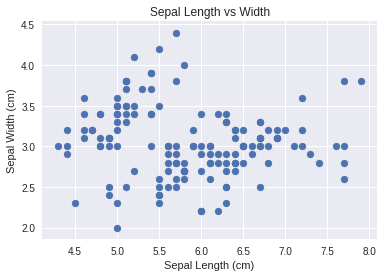

In [114]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

[Text(0,0.5,'COunt'), Text(0.5,0,'Petal Length'), Text(0.5,1,'Histogram')]

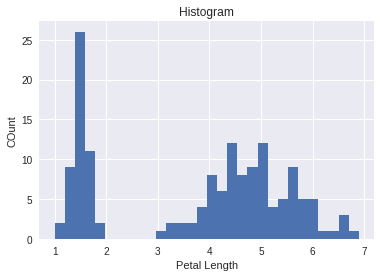

In [131]:
#Student writes code here
#plt.hist(data['petal_length'])
#data.hist(column='petal_length')
ax = plt.axes()
ax.hist(data['petal_length'],bins=30)
ax.set(xlabel="Petal Length", ylabel="COunt", title="Histogram")


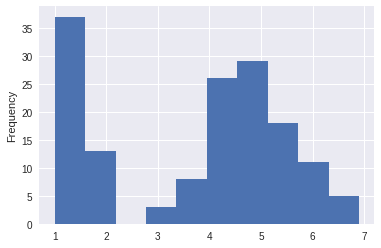

In [132]:
data['petal_length'].plot.hist()

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

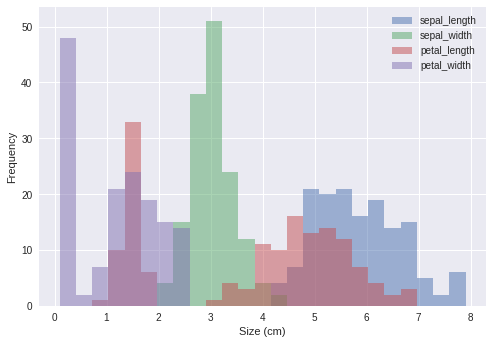

In [136]:
import seaborn as sns

#sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

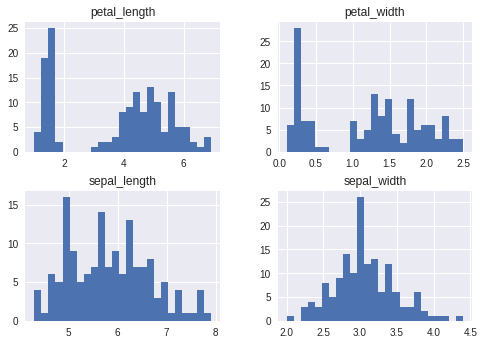

In [168]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')


## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

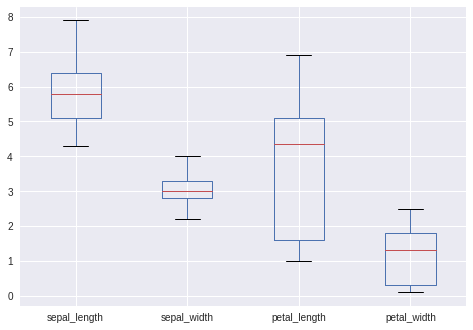

In [169]:
#Student writes code here
data.boxplot()

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


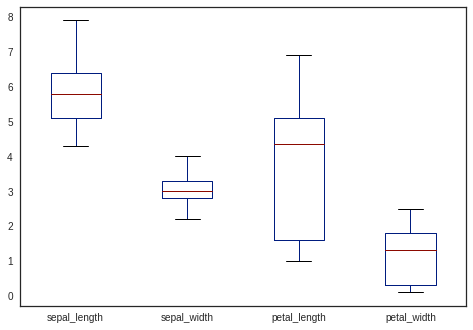

In [175]:
print(data.describe())
data.plot.box()

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [196]:
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data =( data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
          )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


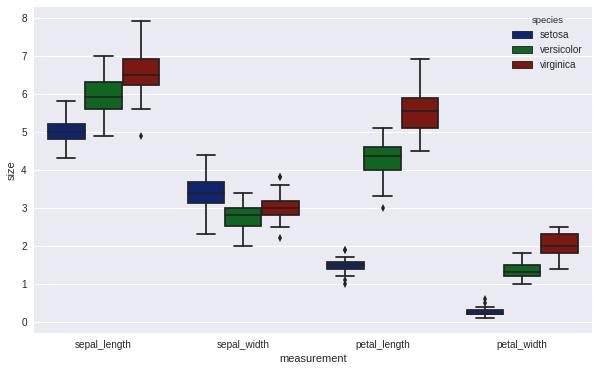

In [211]:
# Now plot the dataframe from above using Seaborn

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(10,6))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

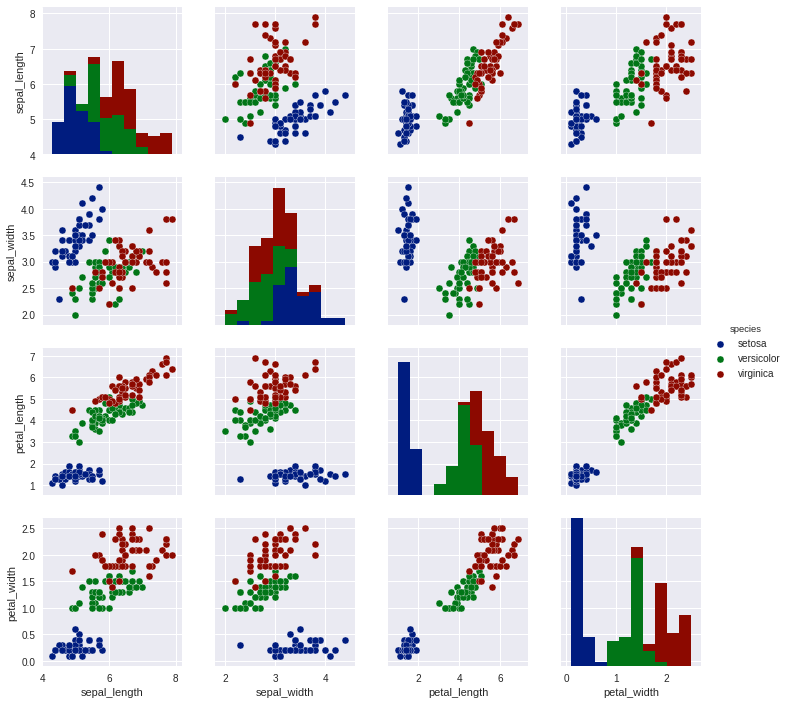

In [214]:
#Student writes code here
sns.pairplot(data, hue='species')

In [0]:
df_single_level_cols = pd.DataFrame([[0, 1], [2, 3]],index=['cat', 'dog'], columns=['weight', 'height'])

In [178]:
df_single_level_cols

,weight,height
cat,0,1
dog,2,3


In [179]:
df_single_level_cols.stack()

cat  weight    0
     height    1
dog  weight    2
     height    3
dtype: int64

In [183]:
df_single_level_cols.stack().shape

(4,)

In [194]:
print(data.set_index('species').stack().to_frame().reset_index().rename(columns={0:'size', 'level_1':'measurement'}))


       species   measurement  size
0       setosa  sepal_length   5.1
1       setosa   sepal_width   3.5
2       setosa  petal_length   1.4
3       setosa   petal_width   0.2
4       setosa  sepal_length   4.9
5       setosa   sepal_width   3.0
6       setosa  petal_length   1.4
7       setosa   petal_width   0.2
8       setosa  sepal_length   4.7
9       setosa   sepal_width   3.2
10      setosa  petal_length   1.3
11      setosa   petal_width   0.2
12      setosa  sepal_length   4.6
13      setosa   sepal_width   3.1
14      setosa  petal_length   1.5
15      setosa   petal_width   0.2
16      setosa  sepal_length   5.0
17      setosa   sepal_width   3.6
18      setosa  petal_length   1.4
19      setosa   petal_width   0.2
20      setosa  sepal_length   5.4
21      setosa   sepal_width   3.9
22      setosa  petal_length   1.7
23      setosa   petal_width   0.4
24      setosa  sepal_length   4.6
25      setosa   sepal_width   3.4
26      setosa  petal_length   1.4
27      setosa   pet